In [1]:
install.packages("enrichR")


also installing the dependency ‘WriteXLS’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [67]:
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(plyr)
library(purrr)
library(vegan)
#library(arrow)
library(parallel)
library(ComplexHeatmap)
library(ggsci)
library(tidyverse)
#library(stabm)
library(enrichR)

In [68]:
master <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/master_combined_DEG_list_all_celltypes.csv")
head(master)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,NOC2L,0.4682601,-0.33564453,0.8327112,-0.40307434,0.6868935,0.9998266,Activated memory B cell,BR1,Y1,DEGs_Male
2,ISG15,0.7716756,0.03101969,0.5329482,0.05820395,0.9535862,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
3,SDF4,0.5631814,0.01246954,0.6510630,0.01915259,0.9847194,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
4,B3GALT6,0.3151741,0.61845489,0.8779896,0.70439886,0.4811844,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
5,UBE2J2,0.4517144,0.17761642,0.6528145,0.27207793,0.7855621,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
6,INTS11,0.3656259,0.07206422,0.6856389,0.10510521,0.9162923,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male


In [69]:
websiteLive <- getOption("enrichR.live")
if (websiteLive) {
    listEnrichrSites()
    setEnrichrSite("Enrichr") # Human genes   
}

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



In [70]:
if (websiteLive) dbs <- listEnrichrDbs()

In [71]:
## if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)

#dbs

,geneCoverage,genesPerTerm,libraryName,link,numTerms,appyter,categoryId
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,13362,275,Genome_Browser_PWMs,http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/,615,ea115789fcbf12797fd692cec6df0ab4dbc79c6a,1
2,27884,1284,TRANSFAC_and_JASPAR_PWMs,http://jaspar.genereg.net/html/DOWNLOAD/,326,7d42eb43a64a4e3b20d721fc7148f685b53b6b30,1
3,6002,77,Transcription_Factor_PPIs,,290,849f222220618e2599d925b6b51868cf1dab3763,1
4,47172,1370,ChEA_2013,http://amp.pharm.mssm.edu/lib/cheadownload.jsp,353,7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630,7
5,47107,509,Drug_Perturbations_from_GEO_2014,http://www.ncbi.nlm.nih.gov/geo/,701,ad270a6876534b7cb063e004289dcd4d3164f342,7
6,21493,3713,ENCODE_TF_ChIP-seq_2014,http://genome.ucsc.edu/ENCODE/downloads.html,498,497787ebc418d308045efb63b8586f10c526af51,7


# IL1B+ Cd14 mono

In [77]:
master_1 <- master %>% filter(master$celltype == 'IL1B+ CD14 monocyte', master$padj <=0.1, master$type == "DEGs_Female" )

In [75]:
head(master_1)

X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,type
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>


In [76]:
gl <- master_1$X
gl

character(0)

In [29]:
dbs <- c("GO_Biological_Process_2023")
if (websiteLive) {
    enriched <- enrichr(gl, dbs)
}

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


In [11]:
dbs <- c("GO_Biological_Process_2023")
if (websiteLive) {
    enriched <- enrichr(c('BCL2A1','PTGS2','NLRP3','RASGEF1B','IL1B','CMTM6','BCL6','G0S2','SGK1','METRNL','OAZ1','TNF','NR4A1','TNFRSF1B','NAMPT','SELENOK','FKBP5','UBE2D1','RBP7','ID2','CYTIP','MIDN'), dbs)
}

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


In [30]:
if (websiteLive) enriched[["GO_Biological_Process_2023"]]

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
Regulation Of Neuroinflammatory Response (GO:0150077),4/19,4.207742e-09,1.382975e-06,0,0,295.74815,5703.8993,IL1B;PTGS2;TNFRSF1B;TNF
Regulation Of Inflammatory Response (GO:0050727),7/240,4.801996e-09,1.382975e-06,0,0,39.54649,757.4828,BCL6;IL1B;NLRP3;PTGS2;METRNL;TNFRSF1B;TNF
Positive Regulation Of Membrane Protein Ectodomain Proteolysis (GO:0051044),3/14,4.171558e-07,6.007044e-05,0,0,286.60766,4210.2109,IL1B;TNFRSF1B;TNF
Positive Regulation Of Acute Inflammatory Response (GO:0002675),3/14,4.171558e-07,6.007044e-05,0,0,286.60766,4210.2109,IL1B;PTGS2;TNF
Extrinsic Apoptotic Signaling Pathway (GO:0097191),4/67,8.038553e-07,9.260413e-05,0,0,70.24691,985.8344,BCL2A1;G0S2;TNFRSF1B;TNF
Regulation Of Membrane Protein Ectodomain Proteolysis (GO:0051043),3/21,1.516663e-06,1.455997e-04,0,0,175.08772,2346.0000,IL1B;TNFRSF1B;TNF
Positive Regulation Of Protein Catabolic Process (GO:0045732),4/92,2.878102e-06,2.368267e-04,0,0,50.22727,640.8186,IL1B;TNFRSF1B;OAZ1;TNF
Positive Regulation Of Nitric Oxide Biosynthetic Process (GO:0045429),3/27,3.321317e-06,2.379027e-04,0,0,131.27632,1656.0703,IL1B;PTGS2;TNF
Positive Regulation Of Nitric Oxide Metabolic Process (GO:1904407),3/28,3.717229e-06,2.379027e-04,0,0,126.01895,1575.5559,IL1B;PTGS2;TNF


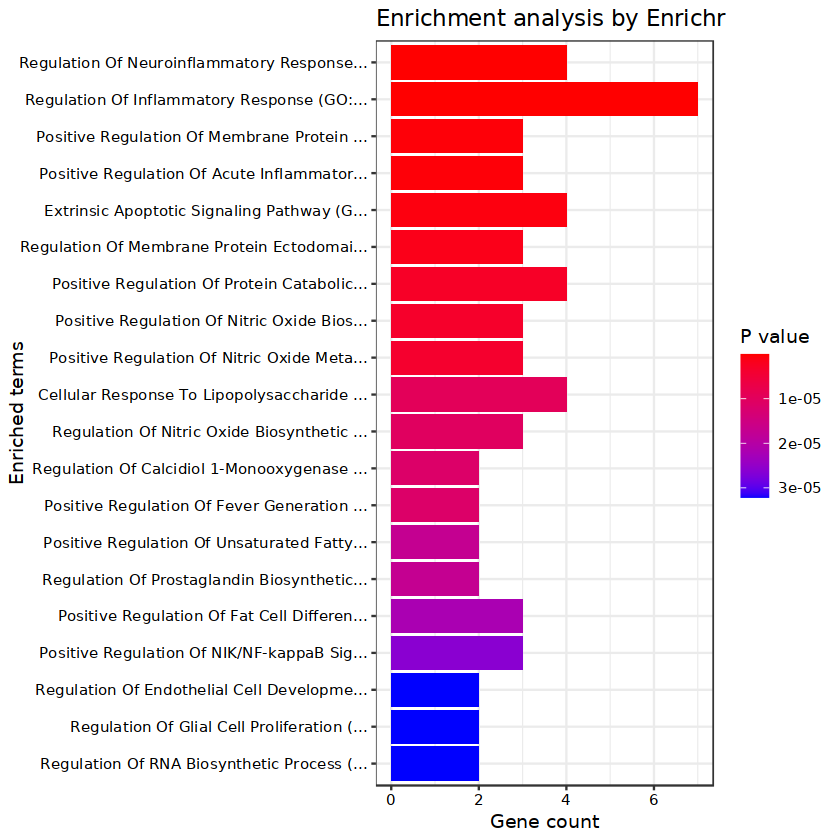

In [13]:
plotEnrich(enriched$GO_Biological_Process_2023[enriched$GO_Biological_Process_2023$Adjusted.P.value< 0.05,], orderBy = 'Adjusted.P.value')

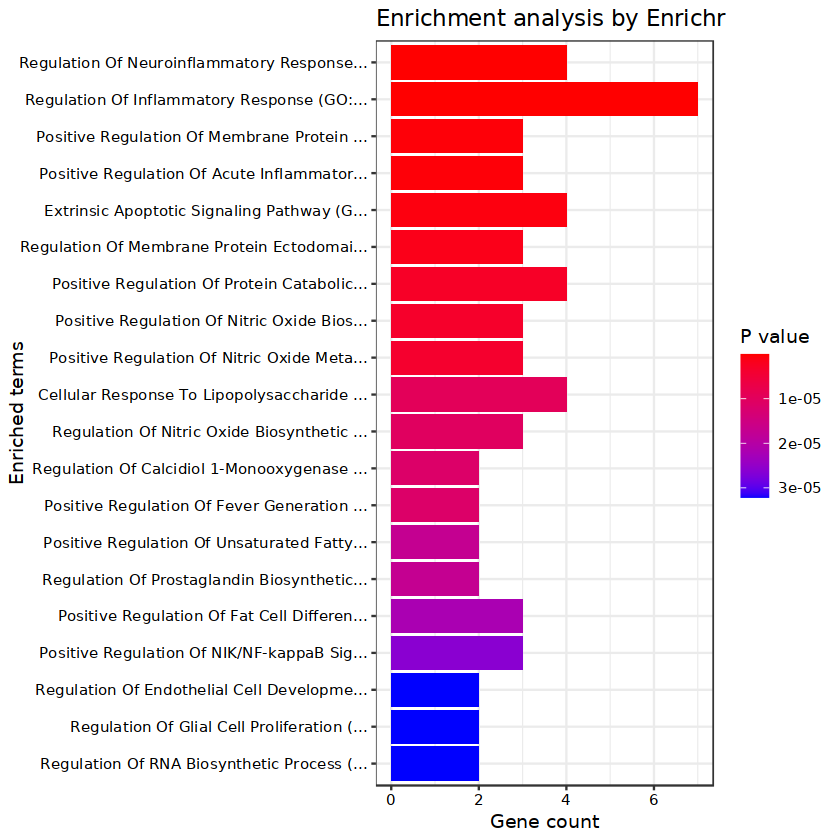

In [35]:
#options(repr.plot.width = 10, repr.plot.height = 5)
plotEnrich(enriched$GO_Biological_Process_2023[enriched$GO_Biological_Process_2023$P.value< 0.05,], orderBy = 'P.value', y= "-log10(P.value)")

# Core Cd14 mono

In [50]:
master_1 <- master %>% filter(master$celltype == 'Core CD14 monocyte', master$padj <=0.1, master$type == "DEGs_Male" )

In [51]:
head(master_1)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,SMC3,740.6208,0.1454654,0.02786091,5.221128,1.778362e-07,0.001056347,Core CD14 monocyte,BR2,Y1,DEGs_Male
2,EVI2A,2385.3609,0.2196469,0.04924884,4.459940,8.198246e-06,0.024348791,Core CD14 monocyte,BR2,Y1,DEGs_Male
3,CARD6,309.3647,0.1969684,0.05106829,3.856961,1.148056e-04,0.085243149,Core CD14 monocyte,BR2,Y1,DEGs_Male
4,PFDN6,484.9378,-0.1456100,0.03773425,-3.858828,1.139322e-04,0.085243149,Core CD14 monocyte,BR1,Y1,DEGs_Male
5,GSAP,709.0426,-0.2317851,0.05763152,-4.021846,5.774377e-05,0.085243149,Core CD14 monocyte,BR1,Y1,DEGs_Male
6,PDP1,504.1718,0.1792870,0.04629511,3.872700,1.076365e-04,0.085243149,Core CD14 monocyte,BR2,Y1,DEGs_Male


In [52]:
gl <- master_1$X
gl

[1] "SMC3"    "EVI2A"   "CARD6"   "PFDN6"   "GSAP"    "PDP1"    "CINP"   
[8] "CARHSP1" "DNPH1"

In [53]:
dbs <- c("GO_Biological_Process_2023")
if (websiteLive) {
    enriched <- enrichr(gl, dbs)
}

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


In [54]:
if (websiteLive) enriched[["GO_Biological_Process_2023"]]

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
Establishment Of Mitotic Sister Chromatid Cohesion (GO:0034087),1/6,0.002697256,0.03747078,0,0,499.650000,2955.68974,SMC3
Nucleotide Catabolic Process (GO:0009166),1/6,0.002697256,0.03747078,0,0,499.650000,2955.68974,DNPH1
Meiotic Sister Chromatid Cohesion (GO:0051177),1/10,0.004491844,0.03747078,0,0,277.527778,1500.17417,SMC3
Negative Regulation Of Amyloid Fibril Formation (GO:1905907),1/11,0.004940043,0.03747078,0,0,249.762500,1326.33410,PFDN6
Regulation Of Amyloid Fibril Formation (GO:1905906),1/15,0.006731046,0.03747078,0,0,178.366071,892.01312,PFDN6
Peptidyl-Threonine Dephosphorylation (GO:0035970),1/17,0.007625474,0.03747078,0,0,156.054688,760.96336,PDP1
Positive Regulation Of Amyloid-Beta Formation (GO:1902004),1/17,0.007625474,0.03747078,0,0,156.054688,760.96336,GSAP
Mitotic Sister Chromatid Cohesion (GO:0007064),1/19,0.008519186,0.03747078,0,0,138.701389,660.97238,SMC3
Chaperone-Mediated Protein Complex Assembly (GO:0051131),1/21,0.009412182,0.03747078,0,0,124.818750,582.37314,PFDN6


Warning message in plotEnrich(enriched$GO_Biological_Process_2023[enriched$GO_Biological_Process_2023$P.value < :
“There are duplicated trimmed names in the plot, consider increasing the 'numChar' setting.”


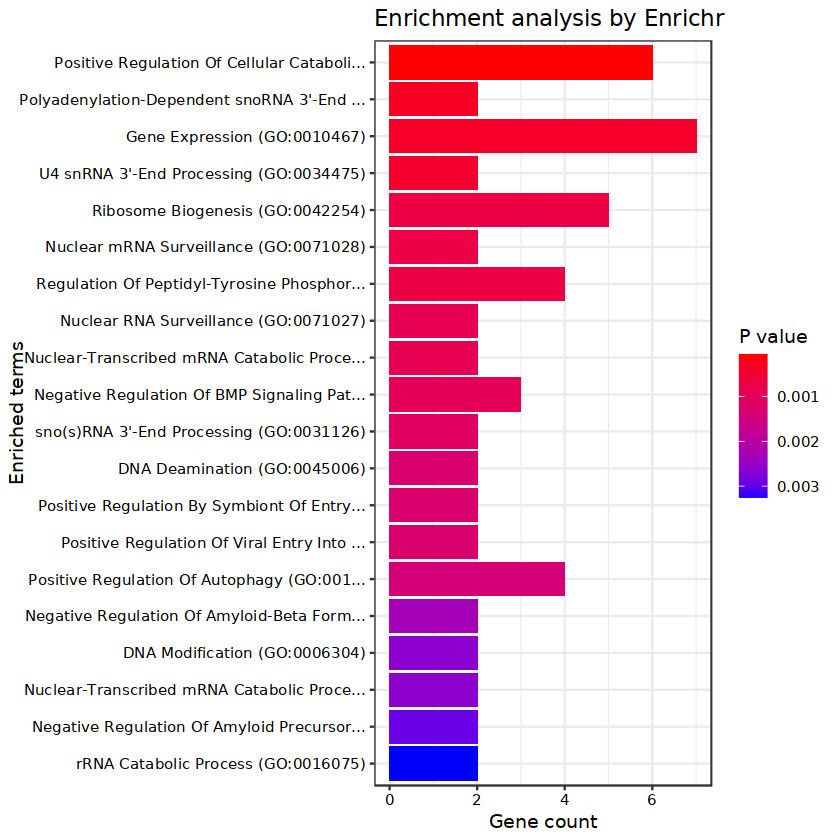

In [49]:
plotEnrich(enriched$GO_Biological_Process_2023[enriched$GO_Biological_Process_2023$P.value< 0.05,], orderBy = 'P.value', y= "P.value", title = )

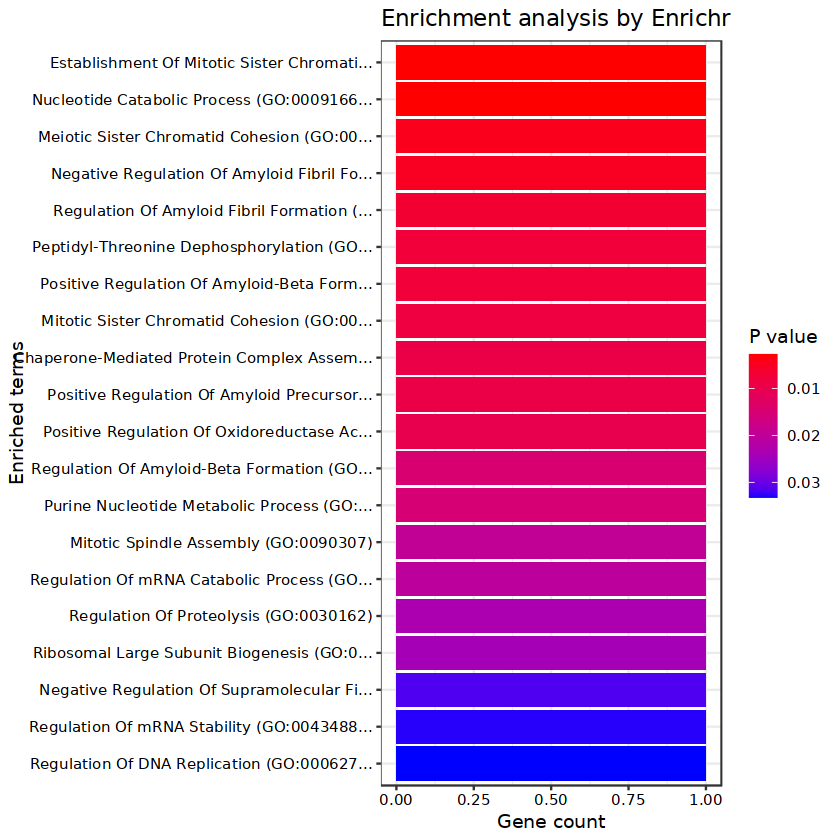

In [41]:
plotEnrich(enriched$GO_Biological_Process_2023[enriched$GO_Biological_Process_2023$P.value< 0.05,], orderBy = 'P.value', y= "P.value", title = )

# ISG+ Cd14 mono

In [61]:
master_1 <- master %>% filter(master$celltype == 'ISG+ CD14 monocyte', master$padj <=0.1, master$type == "DEGs_Female" )

In [62]:
head(master_1)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,FCGR3A,111.46744,0.6544066,0.15174587,4.312517,1.614067e-05,0.03407295,ISG+ CD14 monocyte,BR2,Y1,DEGs_Female
2,ZBTB18,60.71730,0.3395411,0.07751489,4.380334,1.184977e-05,0.03407295,ISG+ CD14 monocyte,BR2,Y1,DEGs_Female
3,RPS6KA5,87.05735,0.3342663,0.07374607,4.532666,5.824387e-06,0.03407295,ISG+ CD14 monocyte,BR2,Y1,DEGs_Female
4,ATP13A3,75.23590,0.2946982,0.07039101,4.186589,2.831774e-05,0.04483406,ISG+ CD14 monocyte,BR2,Y1,DEGs_Female
5,ANKRD13A,136.88955,0.2280755,0.05627052,4.053197,5.052240e-05,0.06189269,ISG+ CD14 monocyte,BR2,Y1,DEGs_Female
6,MAFB,397.07421,-0.2870590,0.07143927,-4.018225,5.863826e-05,0.06189269,ISG+ CD14 monocyte,BR1,Y1,DEGs_Female


In [63]:
gl <- master_1$X
gl

[1] "FCGR3A"   "ZBTB18"   "RPS6KA5"  "ATP13A3"  "ANKRD13A" "MAFB"    
 [7] "NBEAL2"   "EVA1B"    "NUDT4"    "PECAM1"   "SPATS2L"  "PDP1"    
[13] "SLC31A2"  "SORL1"    "PIM1"     "CD300E"   "LRMP"

In [64]:
dbs <- c("GO_Biological_Process_2023")
if (websiteLive) {
    enriched <- enrichr(gl, dbs)
}

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


In [65]:
if (websiteLive) enriched[["GO_Biological_Process_2023"]]

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
Second-Messenger-Mediated Signaling (GO:0019932),2/72,0.001678380,0.06745044,0,0,37.92952,242.3668,FCGR3A;NUDT4
Calcium-Mediated Signaling (GO:0019722),2/85,0.002329057,0.06745044,0,0,31.96787,193.7986,FCGR3A;NUDT4
Negative Regulation Of Erythrocyte Differentiation (GO:0045647),1/5,0.004243144,0.06745044,0,0,312.17188,1705.2235,MAFB
Natural Killer Cell Degranulation (GO:0043320),1/5,0.004243144,0.06745044,0,0,312.17188,1705.2235,FCGR3A
Glomerulus Vasculature Development (GO:0072012),1/5,0.004243144,0.06745044,0,0,312.17188,1705.2235,PECAM1
Neutrophil Extravasation (GO:0072672),1/5,0.004243144,0.06745044,0,0,312.17188,1705.2235,PECAM1
Copper Ion Import (GO:0015677),1/6,0.005089741,0.06745044,0,0,249.72500,1318.6799,SLC31A2
Positive Regulation Of Adipose Tissue Development (GO:1904179),1/7,0.005935662,0.06745044,0,0,208.09375,1066.8502,SORL1
Positive Regulation Of Endocytic Recycling (GO:2001137),1/7,0.005935662,0.06745044,0,0,208.09375,1066.8502,SORL1


Warning message in plotEnrich(enriched$GO_Biological_Process_2023[enriched$GO_Biological_Process_2023$P.value < :
“There are duplicated trimmed names in the plot, consider increasing the 'numChar' setting.”


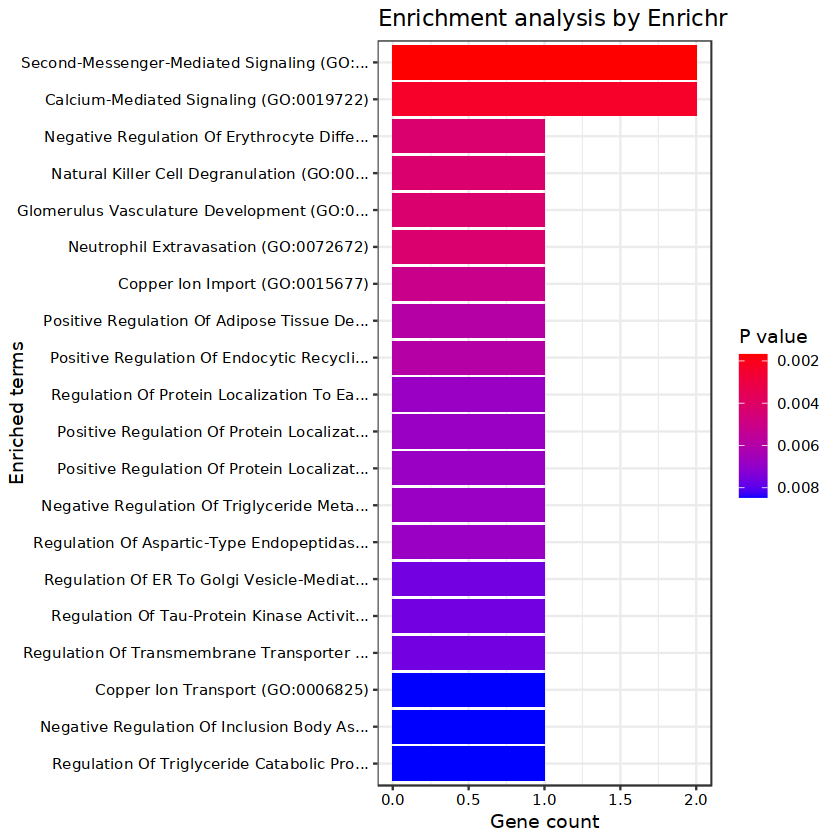

In [66]:
plotEnrich(enriched$GO_Biological_Process_2023[enriched$GO_Biological_Process_2023$P.value< 0.05,], orderBy = 'P.value', y= "P.value", title = )

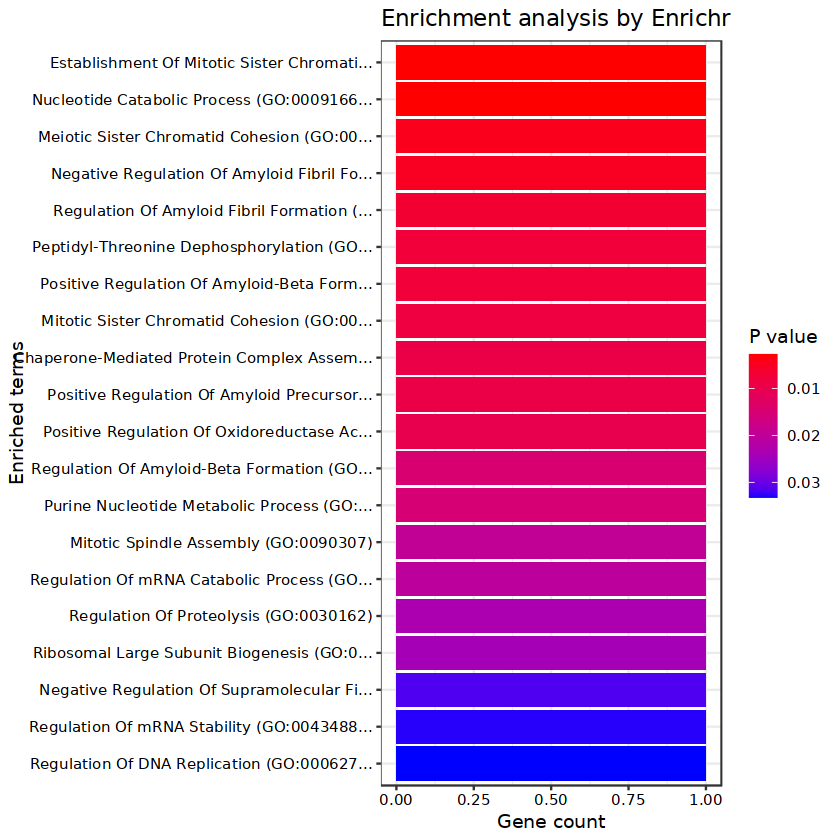

In [41]:
plotEnrich(enriched$GO_Biological_Process_2023[enriched$GO_Biological_Process_2023$P.value< 0.05,], orderBy = 'P.value', y= "P.value", title = )

# IL1B+ Cd14 mono - split br1 vs br2

In [88]:
master_1 <- master %>% filter(master$celltype == 'IL1B+ CD14 monocyte', master$padj <=0.1, master$type == "DEGs_Female", master$Direction == "BR2" )

In [89]:
head(master_1)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,BCL2A1,34.515393,1.0146767,0.1737886,5.838570,5.265087e-09,0.0000108882,IL1B+ CD14 monocyte,BR2,Y1,DEGs_Female
2,PTGS2,18.262251,1.0483899,0.2195651,4.774848,1.798429e-06,0.0018595757,IL1B+ CD14 monocyte,BR2,Y1,DEGs_Female
3,NLRP3,8.916142,0.8007832,0.1789410,4.475124,7.636687e-06,0.0052642232,IL1B+ CD14 monocyte,BR2,Y1,DEGs_Female
4,RASGEF1B,12.182219,1.0262857,0.2352594,4.362359,1.286677e-05,0.0066521193,IL1B+ CD14 monocyte,BR2,Y1,DEGs_Female
5,IL1B,55.745095,1.1557310,0.2684734,4.304824,1.671182e-05,0.0069120094,IL1B+ CD14 monocyte,BR2,Y1,DEGs_Female
6,CMTM6,23.185185,0.4381138,0.1075105,4.075081,4.599836e-05,0.0140965154,IL1B+ CD14 monocyte,BR2,Y1,DEGs_Female


In [90]:
gl <- master_1$X
gl

[1] "BCL2A1"   "PTGS2"    "NLRP3"    "RASGEF1B" "IL1B"     "CMTM6"   
 [7] "BCL6"     "G0S2"     "SGK1"     "METRNL"   "OAZ1"     "TNF"     
[13] "NR4A1"    "TNFRSF1B" "NAMPT"    "SELENOK"  "ID2"      "CYTIP"   
[19] "MIDN"

In [91]:
dbs <- c("GO_Biological_Process_2023")
if (websiteLive) {
    enriched <- enrichr(gl, dbs)
}

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


In [82]:
# dbs <- c("GO_Biological_Process_2023")
# if (websiteLive) {
#     enriched <- enrichr(c('BCL2A1','PTGS2','NLRP3','RASGEF1B','IL1B','CMTM6','BCL6','G0S2','SGK1','METRNL','OAZ1','TNF','NR4A1','TNFRSF1B','NAMPT','SELENOK','FKBP5','UBE2D1','RBP7','ID2','CYTIP','MIDN'), dbs)
# }

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


In [30]:
if (websiteLive) enriched[["GO_Biological_Process_2023"]]

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
Regulation Of Neuroinflammatory Response (GO:0150077),4/19,4.207742e-09,1.382975e-06,0,0,295.74815,5703.8993,IL1B;PTGS2;TNFRSF1B;TNF
Regulation Of Inflammatory Response (GO:0050727),7/240,4.801996e-09,1.382975e-06,0,0,39.54649,757.4828,BCL6;IL1B;NLRP3;PTGS2;METRNL;TNFRSF1B;TNF
Positive Regulation Of Membrane Protein Ectodomain Proteolysis (GO:0051044),3/14,4.171558e-07,6.007044e-05,0,0,286.60766,4210.2109,IL1B;TNFRSF1B;TNF
Positive Regulation Of Acute Inflammatory Response (GO:0002675),3/14,4.171558e-07,6.007044e-05,0,0,286.60766,4210.2109,IL1B;PTGS2;TNF
Extrinsic Apoptotic Signaling Pathway (GO:0097191),4/67,8.038553e-07,9.260413e-05,0,0,70.24691,985.8344,BCL2A1;G0S2;TNFRSF1B;TNF
Regulation Of Membrane Protein Ectodomain Proteolysis (GO:0051043),3/21,1.516663e-06,1.455997e-04,0,0,175.08772,2346.0000,IL1B;TNFRSF1B;TNF
Positive Regulation Of Protein Catabolic Process (GO:0045732),4/92,2.878102e-06,2.368267e-04,0,0,50.22727,640.8186,IL1B;TNFRSF1B;OAZ1;TNF
Positive Regulation Of Nitric Oxide Biosynthetic Process (GO:0045429),3/27,3.321317e-06,2.379027e-04,0,0,131.27632,1656.0703,IL1B;PTGS2;TNF
Positive Regulation Of Nitric Oxide Metabolic Process (GO:1904407),3/28,3.717229e-06,2.379027e-04,0,0,126.01895,1575.5559,IL1B;PTGS2;TNF


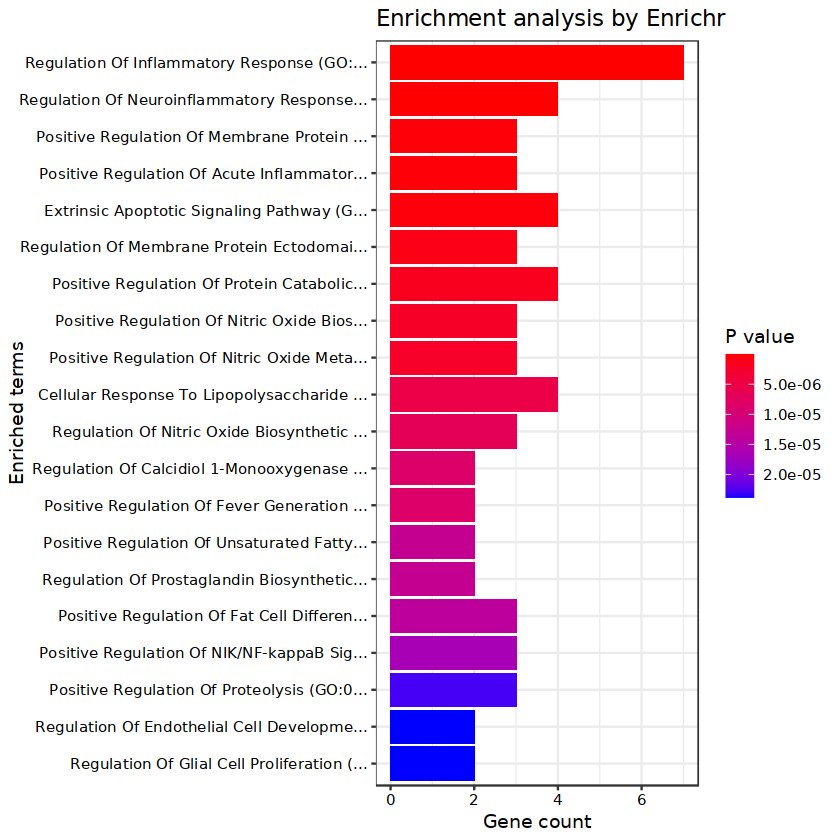

In [92]:
#options(repr.plot.width = 10, repr.plot.height = 5)
plotEnrich(enriched$GO_Biological_Process_2023[enriched$GO_Biological_Process_2023$P.value< 0.05,], orderBy = 'P.value', y= "-log10(P.value)")

# Core Cd14 mono - split br1 vs br2

In [108]:
master_1 <- master %>% filter(master$celltype == 'Core CD14 monocyte', master$padj <=0.1, master$type == "DEGs_Female",  master$Direction == "BR1" )

In [109]:
head(master_1)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,PAK1IP1,258.6758,-0.1956412,0.04416625,-4.429655,9.438404e-06,0.01507595,Core CD14 monocyte,BR1,Y1,DEGs_Female
2,SCAMP2,844.7677,-0.1438431,0.03258861,-4.413907,1.015216e-05,0.01507595,Core CD14 monocyte,BR1,Y1,DEGs_Female
3,RAD23A,1155.5272,-0.1334182,0.03126920,-4.266762,1.983302e-05,0.02356162,Core CD14 monocyte,BR1,Y1,DEGs_Female
4,TNFAIP8L2,877.0510,-0.1627051,0.04018377,-4.049025,5.143138e-05,0.02943396,Core CD14 monocyte,BR1,Y1,DEGs_Female
5,DDX21,2013.0686,-0.1778843,0.04376906,-4.064157,4.820630e-05,0.02943396,Core CD14 monocyte,BR1,Y1,DEGs_Female
6,HSPD1,1284.2478,-0.1820444,0.04790736,-3.799925,1.447396e-04,0.03907194,Core CD14 monocyte,BR1,Y1,DEGs_Female


In [110]:
gl <- master_1$X
gl

[1] "PAK1IP1"   "SCAMP2"    "RAD23A"    "TNFAIP8L2" "DDX21"     "HSPD1"    
 [7] "DNPH1"     "ZNF22"     "SHTN1"     "MRPS35"    "DDX24"     "UTP18"    
[13] "EXOSC5"    "NCOA7"     "UQCC2"     "OSGEP"     "PA2G4"     "GNPTG"    
[19] "VBP1"      "ASNSD1"    "MRPS18B"   "FNIP2"     "CCT2"      "MAFB"     
[25] "TRIM27"    "CCT4"      "OLA1"      "WRNIP1"    "DDX39A"    "APEX1"    
[31] "GPBAR1"    "ITGB2"     "LEPROTL1"  "EXOSC4"    "CFAP298"   "CEBPZ"    
[37] "DCXR"      "UTP11"

In [111]:
dbs <- c("GO_Biological_Process_2023")
if (websiteLive) {
    enriched <- enrichr(gl, dbs)
}

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


In [54]:
if (websiteLive) enriched[["GO_Biological_Process_2023"]]

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
Establishment Of Mitotic Sister Chromatid Cohesion (GO:0034087),1/6,0.002697256,0.03747078,0,0,499.650000,2955.68974,SMC3
Nucleotide Catabolic Process (GO:0009166),1/6,0.002697256,0.03747078,0,0,499.650000,2955.68974,DNPH1
Meiotic Sister Chromatid Cohesion (GO:0051177),1/10,0.004491844,0.03747078,0,0,277.527778,1500.17417,SMC3
Negative Regulation Of Amyloid Fibril Formation (GO:1905907),1/11,0.004940043,0.03747078,0,0,249.762500,1326.33410,PFDN6
Regulation Of Amyloid Fibril Formation (GO:1905906),1/15,0.006731046,0.03747078,0,0,178.366071,892.01312,PFDN6
Peptidyl-Threonine Dephosphorylation (GO:0035970),1/17,0.007625474,0.03747078,0,0,156.054688,760.96336,PDP1
Positive Regulation Of Amyloid-Beta Formation (GO:1902004),1/17,0.007625474,0.03747078,0,0,156.054688,760.96336,GSAP
Mitotic Sister Chromatid Cohesion (GO:0007064),1/19,0.008519186,0.03747078,0,0,138.701389,660.97238,SMC3
Chaperone-Mediated Protein Complex Assembly (GO:0051131),1/21,0.009412182,0.03747078,0,0,124.818750,582.37314,PFDN6


Warning message in plotEnrich(enriched$GO_Biological_Process_2023[enriched$GO_Biological_Process_2023$P.value < :
“There are duplicated trimmed names in the plot, consider increasing the 'numChar' setting.”


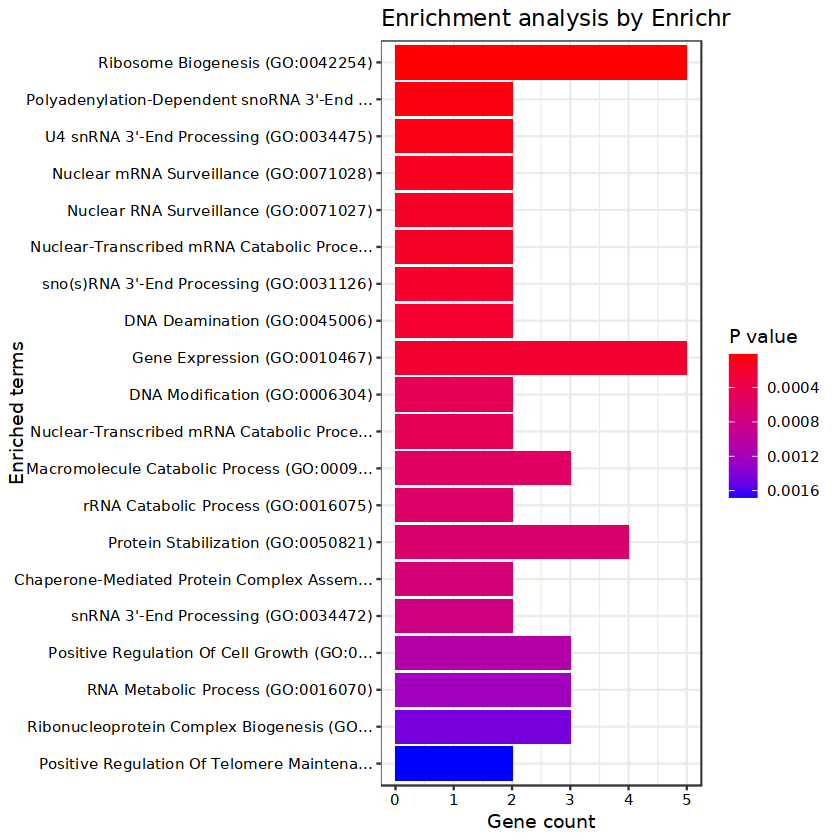

In [112]:
plotEnrich(enriched$GO_Biological_Process_2023[enriched$GO_Biological_Process_2023$P.value< 0.05,], orderBy = 'P.value', y= "P.value", title = )

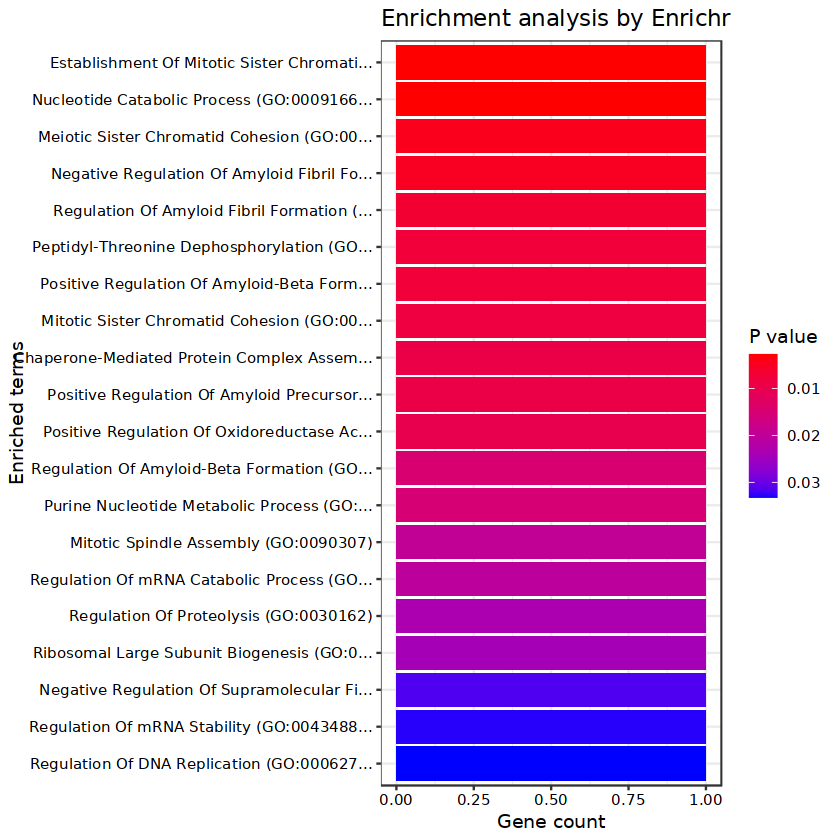

In [41]:
plotEnrich(enriched$GO_Biological_Process_2023[enriched$GO_Biological_Process_2023$P.value< 0.05,], orderBy = 'P.value', y= "P.value", title = )

# ISG+ Cd14 mono - split br1 vs br2

In [128]:
master_1 <- master %>% filter(master$celltype == 'ISG+ CD14 monocyte', master$padj <=0.1, master$type == "DEGs_Female", master$Direction == "BR1" )

In [129]:
head(master_1)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,MAFB,397.07421,-0.2870590,0.07143927,-4.018225,5.863826e-05,0.06189269,ISG+ CD14 monocyte,BR1,Y1,DEGs_Female
2,EVA1B,65.56226,-0.3262057,0.08445445,-3.862505,1.122302e-04,0.07107540,ISG+ CD14 monocyte,BR1,Y1,DEGs_Female
3,SPATS2L,49.89001,-0.4812296,0.12548679,-3.834902,1.256142e-04,0.07231955,ISG+ CD14 monocyte,BR1,Y1,DEGs_Female
4,SLC31A2,224.49888,-0.2499099,0.06590557,-3.791940,1.494752e-04,0.07606136,ISG+ CD14 monocyte,BR1,Y1,DEGs_Female


In [130]:
gl <- master_1$X
gl

[1] "MAFB"    "EVA1B"   "SPATS2L" "SLC31A2"

In [131]:
dbs <- c("GO_Biological_Process_2023")
if (websiteLive) {
    enriched <- enrichr(gl, dbs)
}

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


In [65]:
if (websiteLive) enriched[["GO_Biological_Process_2023"]]

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
Second-Messenger-Mediated Signaling (GO:0019932),2/72,0.001678380,0.06745044,0,0,37.92952,242.3668,FCGR3A;NUDT4
Calcium-Mediated Signaling (GO:0019722),2/85,0.002329057,0.06745044,0,0,31.96787,193.7986,FCGR3A;NUDT4
Negative Regulation Of Erythrocyte Differentiation (GO:0045647),1/5,0.004243144,0.06745044,0,0,312.17188,1705.2235,MAFB
Natural Killer Cell Degranulation (GO:0043320),1/5,0.004243144,0.06745044,0,0,312.17188,1705.2235,FCGR3A
Glomerulus Vasculature Development (GO:0072012),1/5,0.004243144,0.06745044,0,0,312.17188,1705.2235,PECAM1
Neutrophil Extravasation (GO:0072672),1/5,0.004243144,0.06745044,0,0,312.17188,1705.2235,PECAM1
Copper Ion Import (GO:0015677),1/6,0.005089741,0.06745044,0,0,249.72500,1318.6799,SLC31A2
Positive Regulation Of Adipose Tissue Development (GO:1904179),1/7,0.005935662,0.06745044,0,0,208.09375,1066.8502,SORL1
Positive Regulation Of Endocytic Recycling (GO:2001137),1/7,0.005935662,0.06745044,0,0,208.09375,1066.8502,SORL1


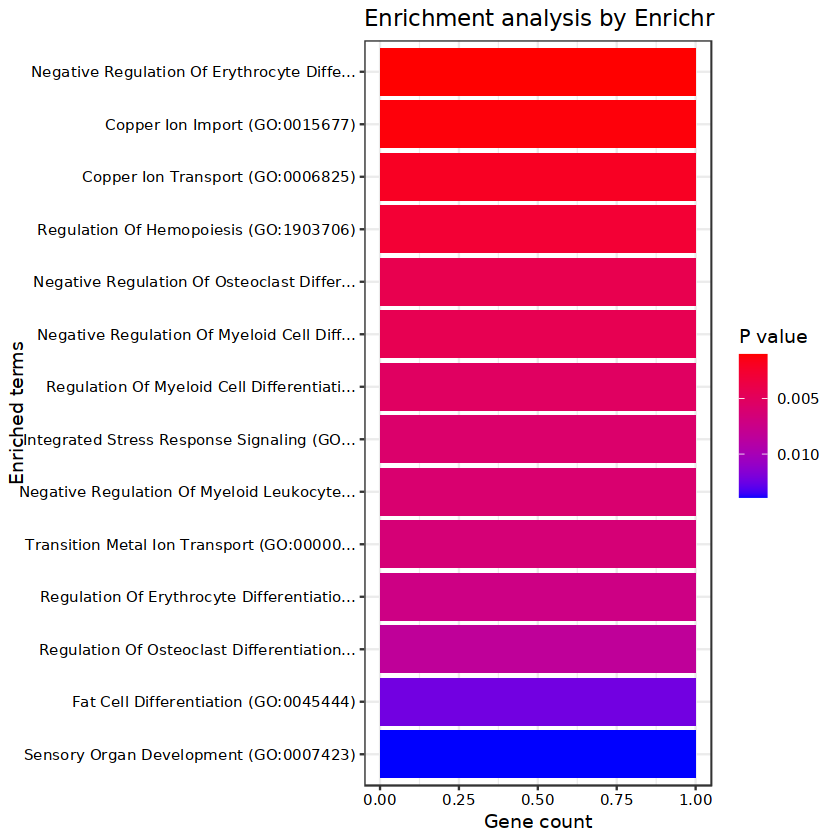

In [132]:
plotEnrich(enriched$GO_Biological_Process_2023[enriched$GO_Biological_Process_2023$P.value< 0.05,], orderBy = 'P.value', y= "P.value" )

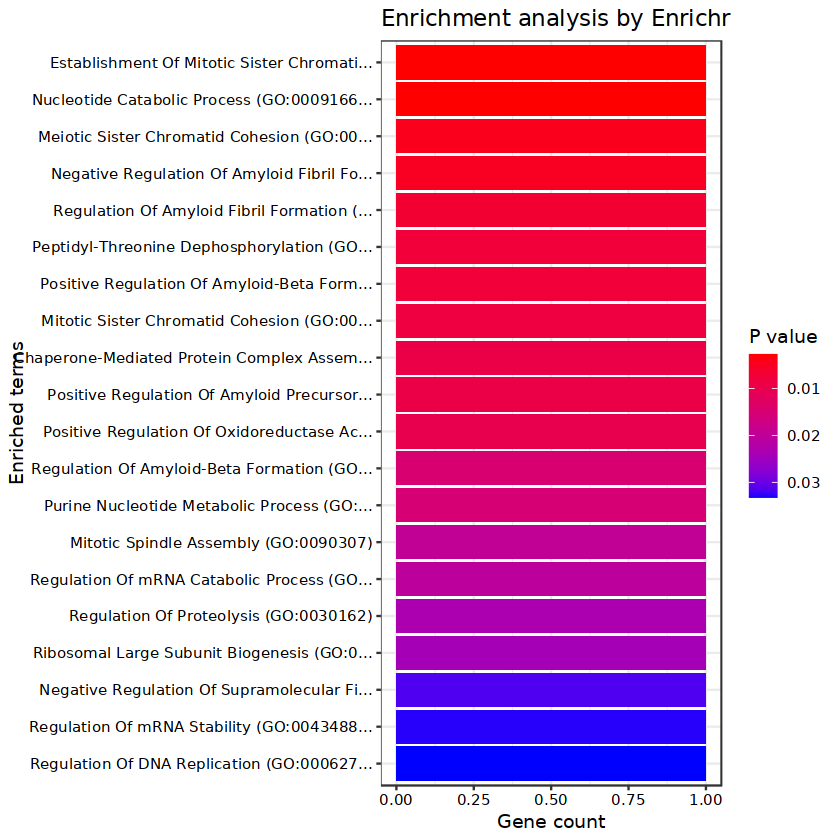

In [41]:
plotEnrich(enriched$GO_Biological_Process_2023[enriched$GO_Biological_Process_2023$P.value< 0.05,], orderBy = 'P.value', y= "P.value", title = )